In [84]:
#Importing needed modules
import os
from shutil import copyfile
import random as rn

In [85]:
#Creating folders for generating
os.mkdir("D:\\datasets\\Mango_leaf_dsease\\ready_to_gen")
os.mkdir("D:\\datasets\\Mango_leaf_dsease\\ready_to_gen\\train")
os.mkdir("D:\\datasets\\Mango_leaf_dsease\\ready_to_gen\\valid")
print('All done ')

All done 


In [86]:
#Getting information of main folders
for folder in os.listdir("D:\\datasets\\Mango_leaf_dsease") :
    path = os.listdir(f'D:\\datasets\\Mango_leaf_dsease\\{folder}')
    print(f'there are {len(path)} files in folder {folder}')

there are 500 files in folder Anthracnose
there are 500 files in folder Bacterial Canker
there are 500 files in folder Cutting Weevil
there are 500 files in folder Die Back
there are 500 files in folder Gall Midge
there are 500 files in folder Healthy
there are 500 files in folder Powdery Mildew
there are 2 files in folder ready_to_gen
there are 500 files in folder Sooty Mould


In [87]:
#Splitting photos to relevant paths (train and valid) by a function
def Make_paths(path,train_size)->None :
    '''function docstring'''
    for folder in os.listdir(path) : 
        if folder == 'ready_to_gen' :
            continue
        os.mkdir(f"D:\\datasets\\Mango_leaf_dsease\\ready_to_gen\\train\\{folder}")
        os.mkdir(f"D:\\datasets\\Mango_leaf_dsease\\ready_to_gen\\valid\\{folder}")
        idx = (train_size*len(os.listdir(f'{path}\\{folder}'))) // 100
        selected_pics = rn.sample(os.listdir(f'{path}\\{folder}'),idx)
        for pic in os.listdir(f'{path}\\{folder}') :
            if pic in selected_pics :
                copyfile(f'{path}\\{folder}\\{pic}',f'{path}\\ready_to_gen\\train\\{folder}\\{pic}')
            else :
                copyfile(f'{path}\\{folder}\\{pic}',f'{path}\\ready_to_gen\\valid\\{folder}\\{pic}')

In [88]:
Make_paths('D:\\datasets\\Mango_leaf_dsease',75)

In [89]:
#getting instance of genarators
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1/255,
                               rotation_range=10,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               horizontal_flip=True,
                               zoom_range=0.1)
valid_gen = ImageDataGenerator(rescale=1/255)

In [90]:
#generating datas
train_path = 'D:\\datasets\\Mango_leaf_dsease\\ready_to_gen\\train'
valid_path = 'D:\\datasets\\Mango_leaf_dsease\\ready_to_gen\\valid'
size = (150,150)
ready_train = train_gen.flow_from_directory(train_path,batch_size=30,target_size=size)
ready_valid = valid_gen.flow_from_directory(valid_path,batch_size=20,target_size=size)

Found 3000 images belonging to 8 classes.
Found 1000 images belonging to 8 classes.


In [91]:
#Creating a model by a function
from tensorflow.keras import layers , models,  Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import RMSprop 
def Create_model()->None :
    '''function docstring'''
    pre_trained_model = InceptionV3(include_top=False,input_shape=(150,150,3))
    for layer in pre_trained_model.layers :
        layer.trainable = False 
    last_layer = pre_trained_model.get_layer('mixed7')
    last_out = last_layer.output
    x = layers.Flatten()(last_out)
    x = layers.Dense(512,activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(8,activation='softmax')(x)
    model = Model(pre_trained_model.input,x)
    model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [92]:
#Training data
history = Create_model().fit(ready_train,epochs=15,validation_data = ready_valid)

Epoch 1/15
100/100 [==============================] - 58s 558ms/step - loss: 1.6829 - accuracy: 0.7783 - val_loss: 0.2215 - val_accuracy: 0.9260
Epoch 2/15
100/100 [==============================] - 55s 549ms/step - loss: 0.3543 - accuracy: 0.9060 - val_loss: 0.1213 - val_accuracy: 0.9650
Epoch 3/15
100/100 [==============================] - 55s 547ms/step - loss: 0.1967 - accuracy: 0.9480 - val_loss: 0.0858 - val_accuracy: 0.9770
Epoch 4/15
100/100 [==============================] - 53s 534ms/step - loss: 0.1516 - accuracy: 0.9583 - val_loss: 0.1137 - val_accuracy: 0.9740
Epoch 5/15
100/100 [==============================] - 69s 688ms/step - loss: 0.1322 - accuracy: 0.9643 - val_loss: 0.0924 - val_accuracy: 0.9760
Epoch 6/15
100/100 [==============================] - 91s 904ms/step - loss: 0.1094 - accuracy: 0.9710 - val_loss: 0.0876 - val_accuracy: 0.9790
Epoch 7/15
100/100 [==============================] - 74s 738ms/step - loss: 0.0995 - accuracy: 0.9743 - val_loss: 0.1627 - val_ac

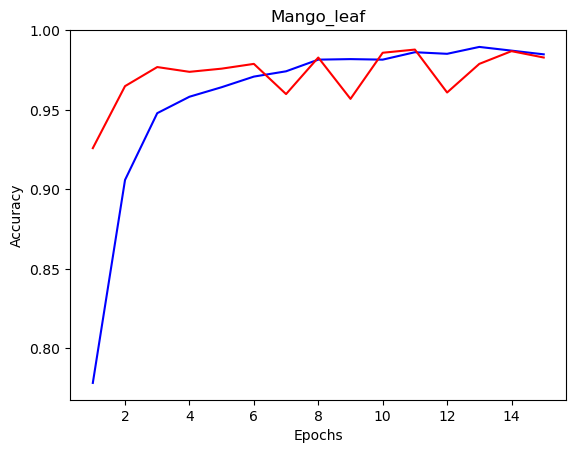

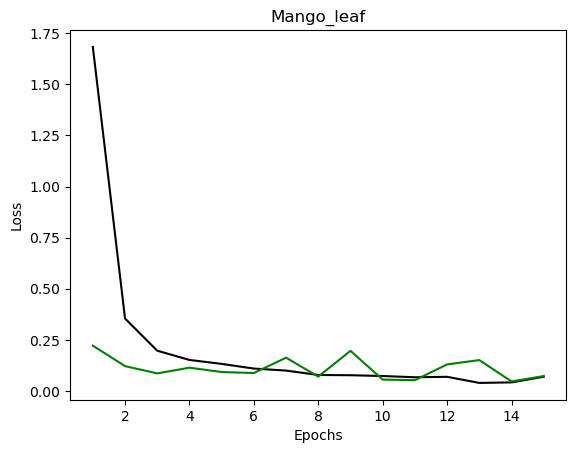

In [93]:
#Visualize models performance
import matplotlib.pyplot as plt
epoch = range(1,16)
results = history.history
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Mango_leaf')
plt.show()
plt.plot(epoch,results['loss'],'black')
plt.plot(epoch,results['val_loss'],'green')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Mango_leaf')
plt.show()